# Project 1. KNN

## Experiments

Importing our KNN:

In [ ]:
from nearest_neighbors import KNNClassifier as my_knn
from cross_validation import knn_cross_val_score as my_knn_cv
from cross_validation import get_score
from cross_validation import kfold

Importing sklearn KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as sk_knn
from sklearn.model_selection import cross_val_score as sk_knn_cv

Importing data and tools:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix

Importing tools for data augmentation:

In [ ]:
from scipy.ndimage import shift as aug_s 
from scipy.ndimage import rotate as aug_r
from scipy.ndimage import gaussian_filter as aug_g

Importing graphics for results presentation:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')

Importing auxiliary tools (reloading imports and timer):

In [ ]:
from timeit import default_timer as timer
import importlib
import autoreload
%load_ext autoreload
%autoreload 2

Loading the dataset:

In [ ]:
X_orig, y_orig = fetch_openml("mnist_784", return_X_y=True)

Transfering data from pandas to numpy format:

In [ ]:
X, y = np.array(X_orig).astype(float), np.array(y_orig)

Splitting the data into training and test samples:

In [ ]:
s1, s2 = 60000, 10000
X_train, y_train = X[:s1, :], y[:s1]
X_test, y_test = X[s1:s1 + s2, :], y[s1:s1 + s2]

## Experiment 1

Let's look at the dependence of **the average execution time of training and the search for the nearest 5 neighbors** (average over 3 iterations) with different algorithms on **the number of features** (randomly selected):

In [ ]:
n_neighbors = 5
strategies = ['my_own', 'brute', 'kd_tree', 'ball_tree']
n_feats = X.shape[1]
used_feats_arr = [10, 20, 60, 100, 330, 560, 784]
n_iters = 3
rand_gen = np.random.default_rng(seed=0)
times_arr = np.empty((len(strategies), len(used_feats_arr), n_iters))

In [ ]:
for i, used_feats in enumerate(used_feats_arr):
    print(f'used_feats = {used_feats}/{n_feats}')
    if (used_feats == n_feats):
        feats_ind = np.s_[:]
    else:
        feats_ind = rand_gen.choice(n_feats, used_feats, replace=False)
    for j, strategy in enumerate(strategies):
        print(f'  strategy = \'{strategy}\'')
        print(f'    iters: ', end='')
        for k in range(n_iters):
            print(f'{k} ', end='')
            clf = my_knn(k=n_neighbors, strategy=strategy, test_block_size=1000)
            start_time = timer()
            clf.fit(X_train[:, feats_ind], y_train)
            clf.find_kneighbors(X_test[:, feats_ind], return_distance=True)
            finish_time = timer()
            times_arr[j, i, k] = finish_time - start_time
        print('done!')
print(f'Total time: {times_arr.sum()} sec')
np.save('saved_binaries/1_times_arr', times_arr, allow_pickle=False)

used_feats = 10/784
  strategy = 'my_own'
    iters: 0 1 2 done!
  strategy = 'brute'
    iters: 0 1 2 done!
  strategy = 'kd_tree'
    iters: 0 1 2 done!
  strategy = 'ball_tree'
    iters: 0 1 2 done!
used_feats = 20/784
  strategy = 'my_own'
    iters: 0 1 2 done!
  strategy = 'brute'
    iters: 0 1 2 done!
  strategy = 'kd_tree'
    iters: 0 1 2 done!
  strategy = 'ball_tree'
    iters: 0 1 2 done!
used_feats = 60/784
  strategy = 'my_own'
    iters: 0 1 2 done!
  strategy = 'brute'
    iters: 0 1 2 done!
  strategy = 'kd_tree'
    iters: 0 1 2 done!
  strategy = 'ball_tree'
    iters: 0 1 2 done!
used_feats = 100/784
  strategy = 'my_own'
    iters: 0 1 2 done!
  strategy = 'brute'
    iters: 0 1 2 done!
  strategy = 'kd_tree'
    iters: 0 1 2 done!
  strategy = 'ball_tree'
    iters: 0 1 2 done!
used_feats = 330/784
  strategy = 'my_own'
    iters: 0 1 2 done!
  strategy = 'brute'
    iters: 0 1 2 done!
  strategy = 'kd_tree'
    iters: 0 1 2 done!
  strategy = 'ball_tree'
    it

Loading the results:

In [ ]:
data = np.load('saved_binaries/1_times_arr.npy', allow_pickle=False)

Plotting a graph, when number of features < 100:

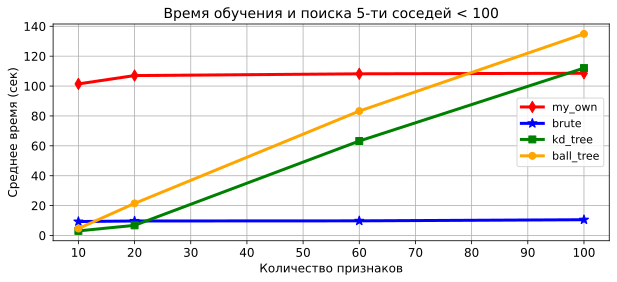

In [ ]:
x_vals = used_feats_arr
data_y = data.mean(axis=2)
params = {
    'color': ['r', 'b', 'g', 'orange'],
    'marker': ['d', '*', 's', 'o'],
    'label': strategies,
    'linestyle': ['-', '-', '-', '-'],
    'linewidth': [3] * 4,
    'markersize': [8, 10, 7, 7],
}

plt.figure(figsize=(10,4))
plt.title('Время обучения и поиска 5-ти соседей < 100', fontsize=14)
plt.grid(True) 
for i, y_vals in enumerate(data_y):
    plt.plot(x_vals[:4], y_vals[:4], **{j: params[j][i] for j in params})

plt.legend(strategies, fontsize=11)
plt.xticks(np.arange(10, 101, 10), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Среднее время (сек)',  fontsize=12)
plt.xlabel('Количество признаков',  fontsize=12)

plt.savefig('saved_graphics/1_times-1.pdf')
plt.show()

Plotting a graph, when number of features > 100:

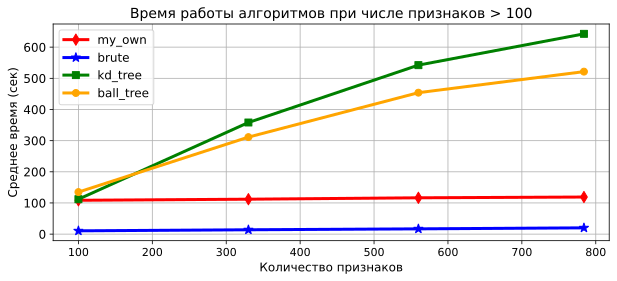

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Время работы алгоритмов при числе признаков > 100', fontsize=14)
plt.grid(True) 
for i, y_vals in enumerate(data_y):
    plt.plot(x_vals[3:], y_vals[3:], **{j: params[j][i] for j in params})

plt.legend(strategies, fontsize=12)
plt.xticks(np.arange(100, 801, 100), fontsize=11)
plt.yticks(fontsize=12)
plt.ylabel('Среднее время (сек)',  fontsize=12)
plt.xlabel('Количество признаков',  fontsize=12)

plt.savefig('saved_graphics/1_times-2.pdf')
plt.show()

The graphs show that with the **used features < 20**, the fastest strategy is **kd_tree**. And with the **used features > 20**, the fastest strategy is **brute**.

## Experiments 2 and 3

In [ ]:
n_neighbors = list(range(1, 11))
n_folds = 3
metrics = ['euclidean', 'cosine']
weights = [False, True]

In [ ]:
cv_acc = np.empty((len(metrics), len(weights), len(n_neighbors)))
cv_time = np.empty((len(metrics), len(weights)))
for i, metric in enumerate(metrics):
    for j, weight in enumerate(weights):
        start = timer()
        cv_acc_dict = my_knn_cv(X_train, y_train, cv = kfold(X_train.shape[0], n_folds),
                                 k_list=n_neighbors, metric=metric, weights=weight,
                                 strategy='brute', test_block_size=1000)
        cv_acc[i, j] = np.array([cv_acc_dict[k].mean() for k in cv_acc_dict])
        finish = timer()
        cv_time[i, j] = (finish - start) / n_folds
np.save('saved_binaries/23_cv_acc', cv_acc, allow_pickle=False)
np.save('saved_binaries/23_cv_time', cv_time, allow_pickle=False)

In [ ]:
cv_acc = np.load('saved_binaries/23_cv_acc.npy', allow_pickle=False)
cv_time = np.load('saved_binaries/23_cv_time.npy', allow_pickle=False)

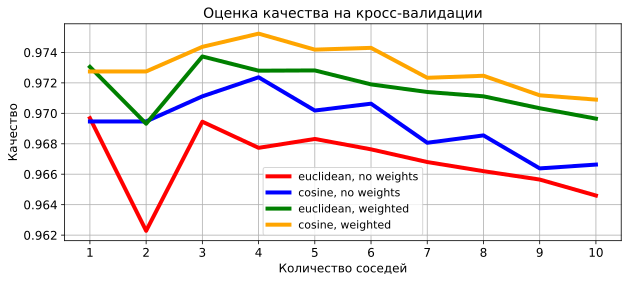

In [ ]:
x_vals = n_neighbors
data_y = cv_acc
params = {
    'color': ['r', 'b', 'g', 'orange'],
    'label': strategies,
    'linestyle': ['-', '-', '-', '-'],
    'linewidth': [4] * 4,
}

plt.figure(figsize=(10,4))
plt.title('Оценка качества на кросс-валидации', fontsize=14)
plt.grid(True) 
for i, metric in enumerate(metrics):
    for j, weight in enumerate(weights):
        plt.plot(x_vals, cv_acc[i, j],
                 **{k: params[k][2 * i + j] for k in params})

legend = [
    'euclidean, no weights',
    'cosine, no weights',
    'euclidean, weighted',
    'cosine, weighted',
]
plt.legend(legend, fontsize=11)
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Качество',  fontsize=12)
plt.xlabel('Количество соседей',  fontsize=12)

plt.savefig('saved_graphics/23_cv_acc.pdf')
plt.show()

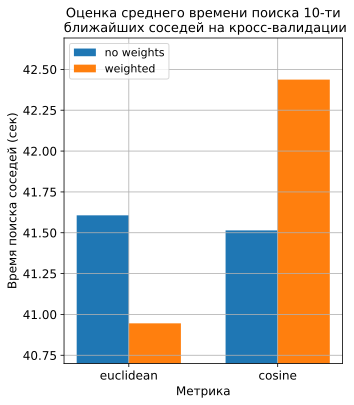

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Оценка среднего времени поиска 10-ти\n ближайших соседей на кросс-валидации', fontsize=13)
width = 0.35
ids = np.arange(1,3)

plt.grid(True)
plt.bar(ids - width / 2, cv_time[:, 0], width)
plt.bar(ids + width / 2, cv_time[:, 1], width)

legend = [
    'no weights',
    'weighted',
]
plt.legend(legend, loc='upper left', fontsize=11)
plt.xticks(ids, ['euclidean', 'cosine'], fontsize=12)
plt.yticks(fontsize=12)
delta = 0.006
bottom_lim, top_lim = (1 - delta) * cv_time.min(),\
                      (1 + delta) * cv_time.max()
plt.ylim((bottom_lim, top_lim))
plt.xlabel('Метрика', fontsize=12)
plt.ylabel('Время поиска соседей (сек)', fontsize=12)
plt.savefig('saved_graphics/23_cv_time.pdf')
plt.show()

## Experiment 4

As can be seen from the accuracy on cross-validation, the best algorithm is **weighted cosine (brute, as the fastest strategy) with k = 4**:

In [71]:
best_clf = my_knn(k=4, strategy='brute', metric='cosine',
                  weights=True,test_block_size=1000)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
best_acc_on_test = get_score('accuracy', y_test, y_pred)
print(f'Accuracy on test: {best_acc_on_test * 100} %')

Accuracy on test: 97.52 %


In [ ]:
best_acc_on_cv = cv_acc[1, 1][3]
print(f'Accuracy on cross-validation: {best_acc_on_cv * 100} %')

Accuracy on cross-validation: 97.52333333333333 %


Accuracy of the best algorithm on cross-validation is 0.0000(3) greater than the accuracy on test

According to this [source](https://paperswithcode.com/sota/image-classification-on-mnist), the quality of the best algorithms in this sample:
1. Branching/Merging CNN + Homogeneous Vector Capsules - 99.87% accuracy
2. EnsNet - 99.84% accuracy
3. Efficient-CapsNet - 99.84% accuracy

**Confusion matrix** and function for plotting it:

In [36]:
def do_conf_mat(conf_mat, name='Матрица ошибок'): 
    fig, ax = plt.subplots(figsize=(6,5), tight_layout=True)
    im = ax.imshow(conf_mat, vmax=30, cmap='RdPu')
    digits = range(0, 10)

    ax.grid(False)
    ax.set_xticks(digits)
    ax.set_yticks(digits)
    ax.tick_params(length=0)
    ax.set_xlabel('Предсказанный класс', fontsize=12)
    ax.set_ylabel('Истинный класс', fontsize=12)
    ax.set_title(name, fontsize=14)
    conf_cbar = ax.figure.colorbar(im)
    conf_cbar.outline.set_visible(False)
    conf_cbar.ax.tick_params(length=0)
    
    cticks = list(range(0, 31, 5))
    conf_cbar.set_ticks(cticks)
    cticks[-1] = '>30'
    conf_cbar.set_ticklabels(cticks)
    

    for i in range(10):
        for j in range(10):
            im.axes.text(i, j, conf_mat[j, i], horizontalalignment='center',
            verticalalignment='center', c='white' if conf_mat[j, i] > 20 else 'black',
            fontsize=10)
    return fig, ax

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
np.save('saved_binaries/4_conf_mat', conf_mat, allow_pickle=False)

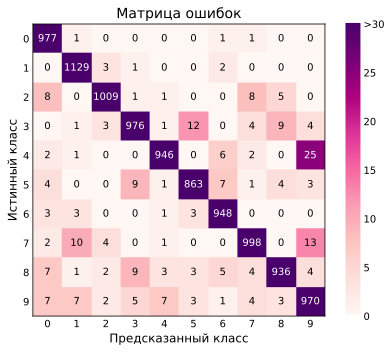

In [ ]:
conf_mat = np.load('saved_binaries/4_conf_mat.npy', allow_pickle=False)
fig, ax = do_conf_mat(conf_mat)
plt.savefig(f'saved_graphics/4_conf_mat.pdf')
plt.show()

From confusion matrix it can be seen that among the most **common errors** are:
1. '4' is recognized as '9' (25 times)
2. '7' is recognized as '9' (13 times)
3. '3' is recognized as '5' (12 times)
4. '7' is recognized as '1' (10 times)
5. '5' is recognized as '3' (9 times)
6. '8' is recognized as '3' (9 times)
7. '2' is recognized as '0' (8 times)

Function for representing mistakes on test samples:

In [ ]:
def test_mistakes_ind(test_digit, X_test, y_test, y_pred):
    return ((y_test != y_pred) * (y_test == test_digit)).nonzero()[0]

In [80]:
def vis_test_digits(indexes, X_test, y_test, y_pred, n_in_row=5,
                    factor=2, save_name=None, figsize=None, suptitle=None):
    digits = X_test[indexes].reshape(-1, 28, 28)
    l = len(indexes)
    cols = min(l, n_in_row)
    rows = l // n_in_row + (1 if l % n_in_row else 0)
    if figsize==None:
        figsize = (int(factor * cols), int(factor * rows))
    fig = plt.figure(figsize=figsize)
    if suptitle!=None:
        fig.suptitle(suptitle, fontsize=14)
    for i, (j, digit) in enumerate(zip(indexes, digits)):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(digit, interpolation='none', cmap='Greys')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(f'index: {j}\ntest: {y_test[j]}\npred: {y_pred[j]}', fontsize=9)
    plt.subplots_adjust(hspace=0.76)
    if (save_name != None):
      plt.savefig(f'saved_graphics/4_mistakes_{save_name}.pdf')
    plt.show()

Mistakes on test samples:

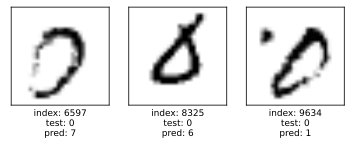

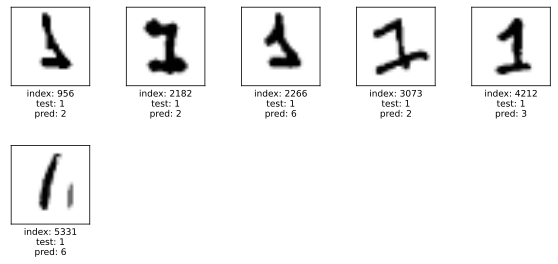

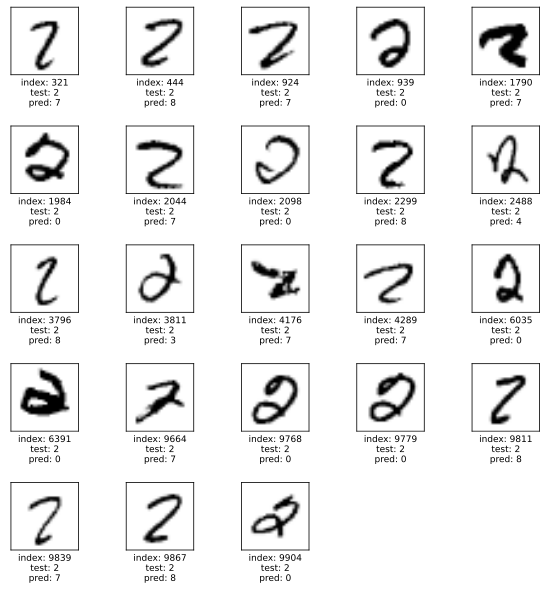

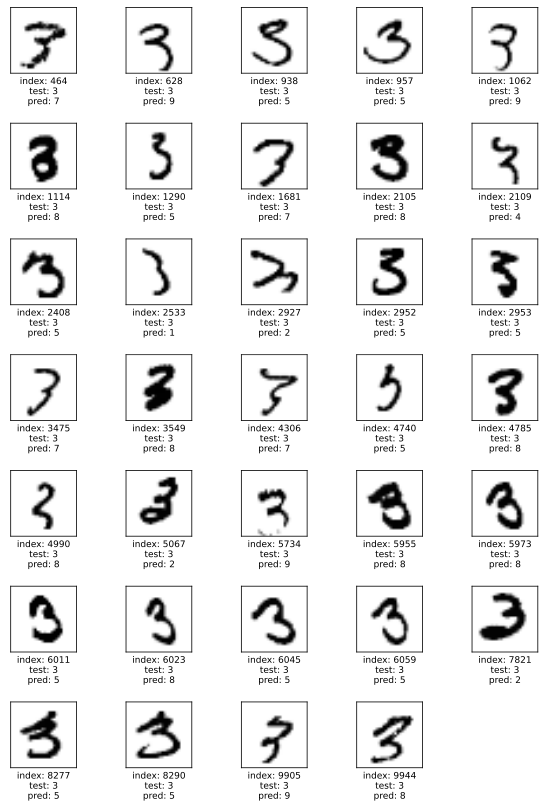

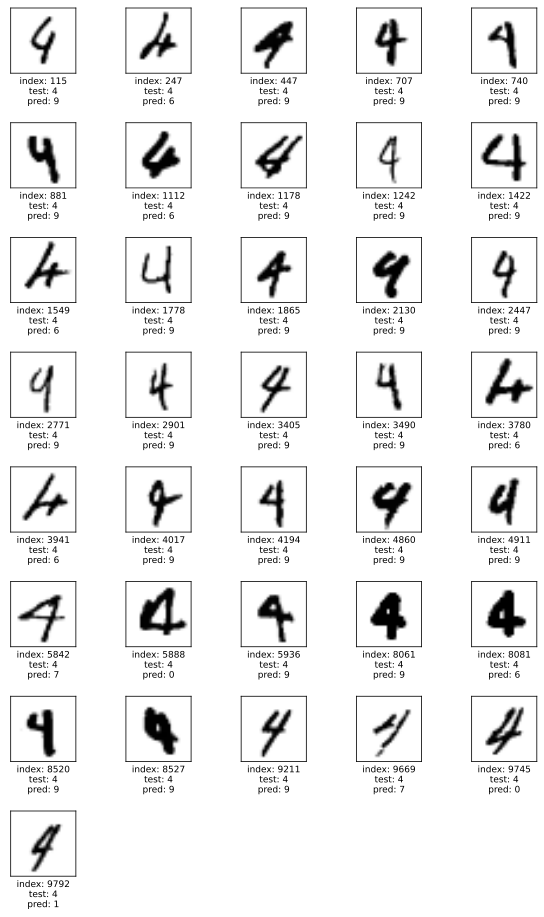

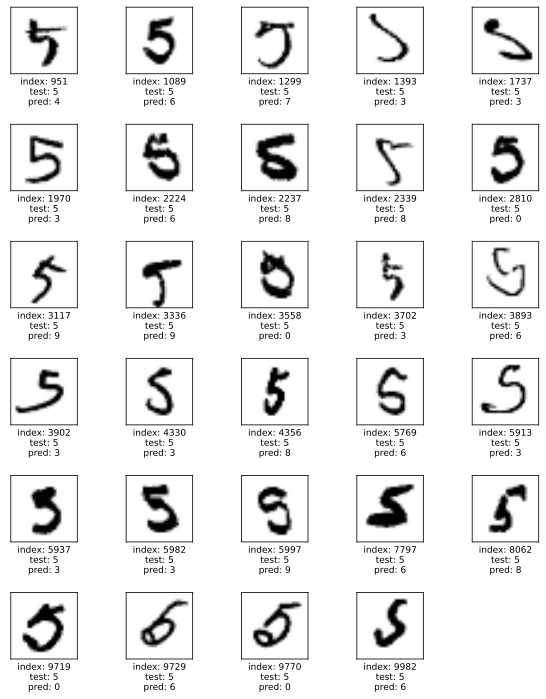

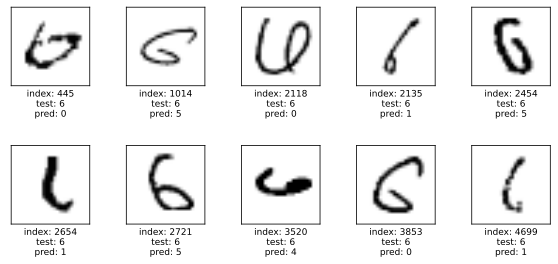

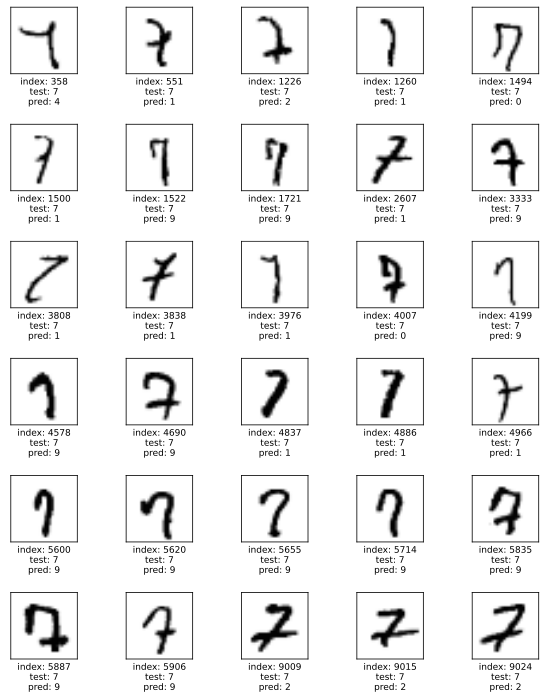

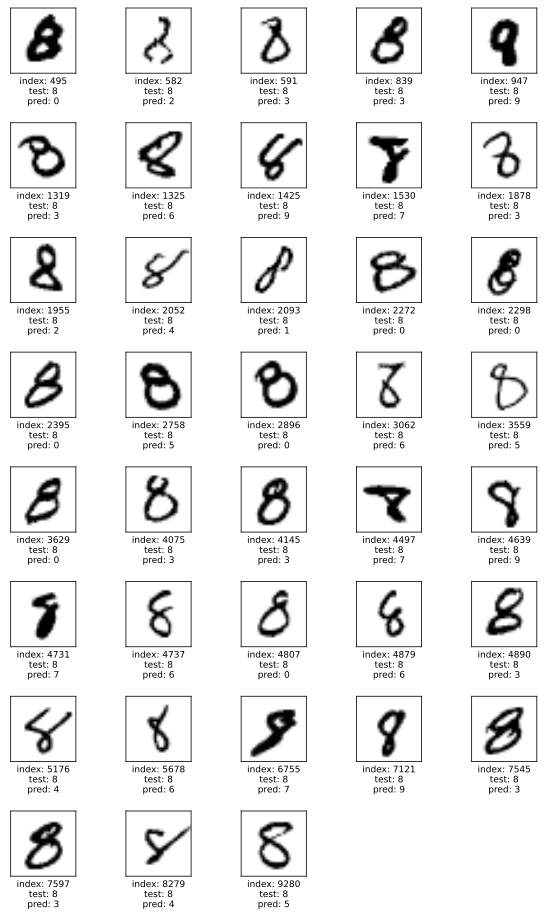

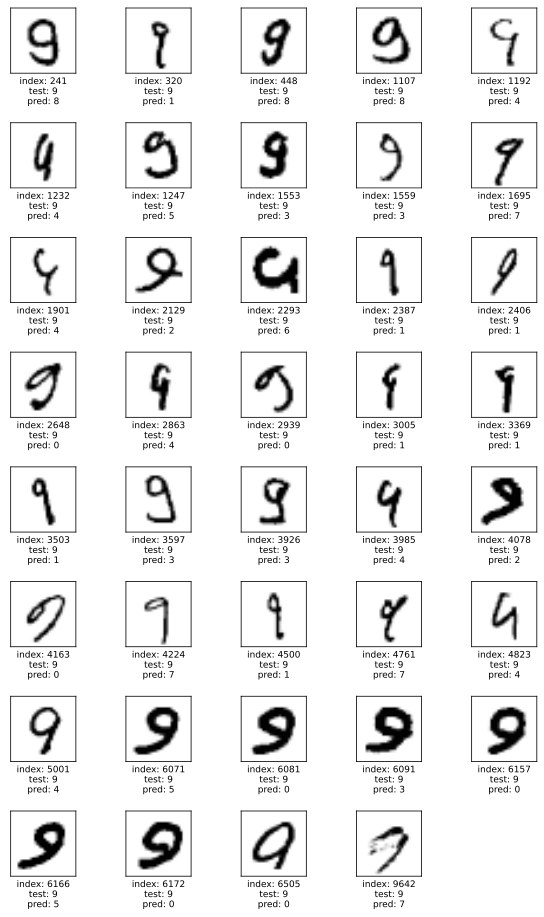

In [ ]:
for i in range(0, 10):
    indexes = test_mistakes_ind(str(i), X_test, y_test, y_pred)
    vis_test_digits(indexes, X_test, y_test, y_pred)

**Common characteristics** of objects where mistakes on test samples were made:

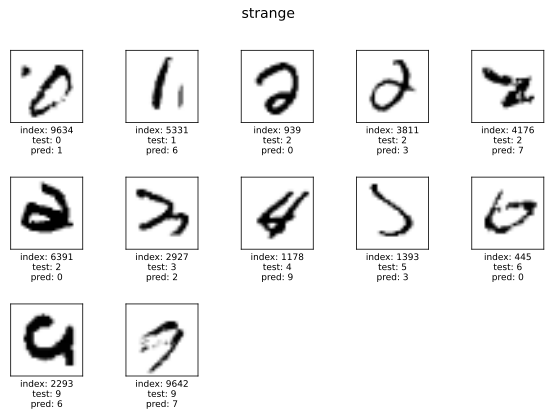

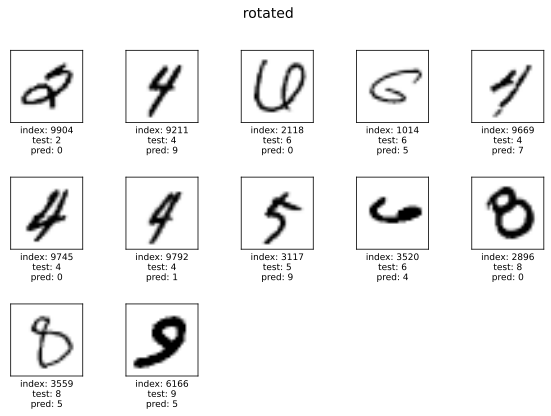

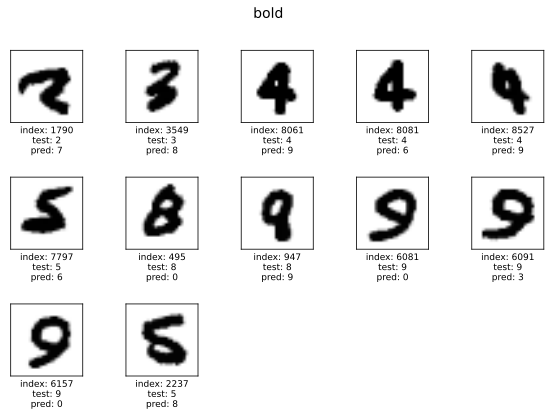

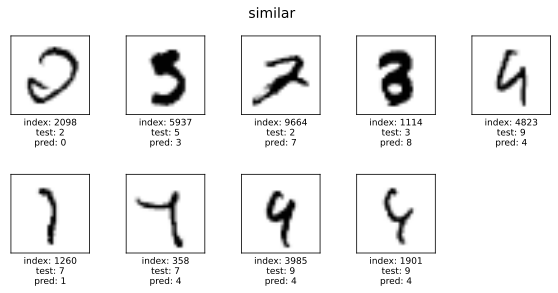

In [83]:
mistakes = {
    'strange': [9634, 5331, 939, 3811, 4176, 6391, 2927, 1178, 1393, 445, 2293, 9642],
    'rotated': [9904,9211, 2118, 1014, 9669, 9745, 9792, 3117, 3520, 2896, 3559, 6166],
    'bold': [1790, 3549, 8061, 8081, 8527, 7797, 495, 947, 6081, 6091, 6157, 2237],
    'similar': [2098, 5937, 9664, 1114, 4823, 1260, 358, 3985, 1901],
}

for key, ind in mistakes.items():
    vis_test_digits(ind, X_test, y_test, y_pred, save_name=key, suptitle=key)

## Experiment 5

In [ ]:
def vis_digit(x_digit):
    digit = x_digit.reshape(28, 28)
    fig, ax = plt.subplots()
    ax.imshow(digit, interpolation='none', cmap='Greys')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

def aug(X, y, method, case):
    X = X.copy()
    y = y.copy()
    n_obj = X.shape[0]
    factor = 1 + len(case)
    X_aug = np.empty((factor * n_obj, X.shape[1]), dtype=X.dtype)
    X_aug[:n_obj] = X
    y_aug = np.empty(factor * n_obj, dtype=y.dtype)
    y_aug[:n_obj] = y
    for i, option in enumerate(case):
      X_transformed = list(X.reshape((-1, 28, 28)))
      if method == 'rotate':
          for j, im in enumerate(X_transformed):
            X_transformed[j] = \
                aug_r(im, option, reshape=False, prefilter=False)
      elif method == 'shift':
          for j, im in enumerate(X_transformed):
            X_transformed[j] = aug_s(im, option)
      elif method == 'gauss':
          for j, im in enumerate(X_transformed):
            X_transformed[j] = aug_g(im, option)
      else:
          raise ValueError(f'Unknown augmentation method {method}')
      X_transformed = np.array(X_transformed).reshape((-1, 784))
      X_aug[n_obj * (i + 1):n_obj * (i + 2)] = X_transformed
      y_aug[n_obj * (i + 1):n_obj * (i + 2)] = y
    return X_aug, y_aug

The augmented training sample will be constructed from **once randomly selected third of the original training sample**.
For cross-validation on an augmented train sample, we use the best parameters **(weighted brute with cosine metric)**:

In [ ]:
aug_transformations = {
    'rotate': [[5, -5], [10, -10], [15, -15]],
    'shift': [[(0, 1), (0, -1)], [(0, 2), (0, -2)], [(0, 3), (0, -3)],
              [(1, 0), (-1, 0)], [(2, 0), (-2, 0)], [(3, 0), (-3, 0)]],
    'gauss': [[0.5], [1], [1.5]],
}

In [ ]:
n_obj = X_train.shape[0]
aug_ind = np.random.permutation(n_obj)[:]
n_neighbors = list(range(1, 11))
knn_cv_params = {
    'k_list': n_neighbors,
    'metric': 'cosine',
    'weights': True,
    'strategy': 'brute',
    'test_block_size': 1000
}

In [17]:
aug_cv_acc = dict()
for i, method in enumerate(aug_transformations):
    aug_cv_acc[method] = np.empty((len(aug_transformations[method]),
                                   len(n_neighbors)))
    print(f'Method: {method}')
    for j, case in enumerate(aug_transformations[method]):
        print(f'  Case: {case}')
        start = timer()
        X_train_aug, y_train_aug = aug(X_train[aug_ind], y_train[aug_ind],
                                       method, case)
        finish = timer()
        print(f'    Augmentation done!     \
              Time: {(finish - start):.2f} seconds')
        start = timer()
        d = my_knn_cv(X_train_aug, y_train_aug, **knn_cv_params)
        finish = timer()
        print(f'    Cross-validation done! \
              Time: {(finish - start):.2f} seconds')
        aug_cv_acc[method][j] = np.array([d[k].mean() for k in d])
    np.save(f'saved_binaries/5_aug_cv_{method}', aug_cv_acc[method],
            allow_pickle=False)
    print(f'==Method data saved!==')

Method: rotate
  Case: [5, -5]
    Augmentation done!                   Time: 20.95 seconds
    Cross-validation done!               Time: 1018.23 seconds
  Case: [10, -10]
    Augmentation done!                   Time: 20.54 seconds
    Cross-validation done!               Time: 993.34 seconds
  Case: [15, -15]
    Augmentation done!                   Time: 20.21 seconds
    Cross-validation done!               Time: 1011.36 seconds
==Method data saved!==
Method: shift
  Case: [(0, 1), (0, -1)]
    Augmentation done!                   Time: 17.06 seconds
    Cross-validation done!               Time: 978.25 seconds
  Case: [(0, 2), (0, -2)]
    Augmentation done!                   Time: 17.70 seconds
    Cross-validation done!               Time: 1018.89 seconds
  Case: [(0, 3), (0, -3)]
    Augmentation done!                   Time: 17.64 seconds
    Cross-validation done!               Time: 965.32 seconds
  Case: [(1, 0), (-1, 0)]
    Augmentation done!                   Time: 17.8

In [23]:
aug_cv_acc = dict()
for method in ['rotate', 'shift', 'gauss']:
    if method == 'rotate':
        aug_cv_acc['rotation'] = \
            np.load(f'saved_binaries/5_aug_cv_{method}.npy', allow_pickle=False)
    elif method == 'shift':
        data = \
            np.load(f'saved_binaries/5_aug_cv_{method}.npy', allow_pickle=False)
        l = int(data.shape[0] / 2)
        aug_cv_acc['horizontal shift'] = data[:l]
        aug_cv_acc['vertical shift'] = data[l:]
    elif method == 'gauss':
        aug_cv_acc['gaussian filter'] = \
            np.load(f'saved_binaries/5_aug_cv_{method}.npy', allow_pickle=False)

Accuracy of the best algorithm **(weighted brute with cosine metric)** on cross-validation on the **once randomly selected third of original training sample** (it is no augmentation experiment):

In [ ]:
method = 'no_aug'
print(f'Method: {method}')
no_aug_cv_acc = np.empty(len(n_neighbors))
start = timer()
no_aug_cv_acc_dict = my_knn_cv(X_train[aug_ind], y_train[aug_ind],
                               **knn_cv_params)
finish = timer()
print(f'  Cross-validation done! Time: {(finish - start):.2f} seconds')
no_aug_cv_acc = \
    np.array([no_aug_cv_acc_dict[k].mean() for k in no_aug_cv_acc_dict])
np.save(f'saved_binaries/5_aug_cv_{method}', no_aug_cv_acc, allow_pickle=False)
print(f'==Method data saved!==')

Method: no_aug


In [ ]:
method = 'no_aug'
no_aug_cv_acc = \
    np.load(f'saved_binaries/5_aug_cv_{method}.npy', allow_pickle=False)

Plotting graphs (the black line shows accuracy on the no augmentation experiment):

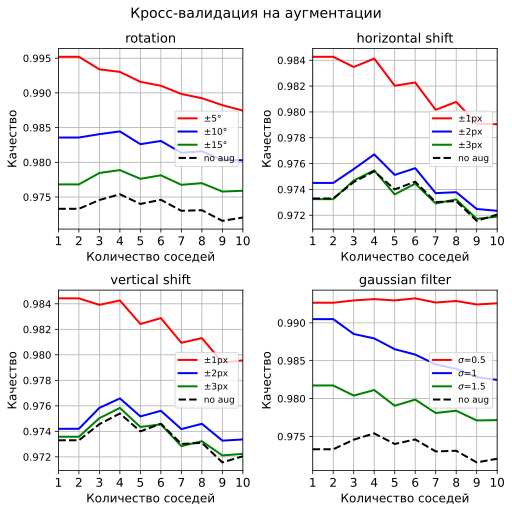

In [26]:
plt_params = {
    'color': ['r', 'b', 'g', 'black'],
    'linestyle': ['-', '-', '-', '--'],
    'linewidth': [2] * 4,
}

legend = {
    'rotation': ['±5°', '±10°', '±15°', 'no aug'],
    'horizontal shift': ['±1px', '±2px', '±3px', 'no aug'],
    'vertical shift': ['±1px', '±2px', '±3px', 'no aug'],
    'gaussian filter': ['$\sigma$=0.5', '$\sigma$=1',
                        '$\sigma$=1.5', 'no aug']
}

fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(7, 7))
fig.suptitle('Кросс-валидация на аугментации', fontsize=14)
x_vals = n_neighbors
for i, (method, ax) in enumerate(zip(aug_cv_acc, axes.flatten())):
    ax.set_title(list(legend.keys())[i], fontsize=13)
    ax.set_xticks(n_neighbors)
    ax.set_xticklabels(n_neighbors, fontsize=12)
    ax.set_xlim(1, 10)
    ax.set_xlabel('Количество соседей', fontsize=12)
    ax.set_ylabel('Качество', fontsize=12)
    ax.grid(True) 
    for j, case in enumerate(aug_cv_acc[method]):
        ax.plot(x_vals, case, label=legend[method][j],
                 **{k: plt_params[k][j] for k in plt_params})
    ax.plot(x_vals, no_aug_cv_acc, label=legend[method][-1],
                 **{k: plt_params[k][-1] for k in plt_params})
    ax.legend(fontsize=9, loc='center right')
plt.savefig(f'saved_graphics/5_aug_cv_acc.pdf')
plt.show()

Best transformations **(the conclusions are based on experiments with the third part of train samples)**:
* Rotation: ±5°
* Shift: ±1px
* Gaussian filter: $\sigma$=0.5

Now: predictions on best augmentation parameters on **full train sample with augmentation**:

In [52]:
knn_params = {
    'metric': 'cosine',
    'weights': True,
    'strategy': 'brute',
    'test_block_size': 1000
}

best_aug_trans = {
    'rotate': [[5, -5]],
    'shift': [[(0, 1), (0, -1)], [(1, 0), (-1, 0)]],
    'gauss': [[0.5]],
}

best_aug_k = {
    'rotate': 2,
    'shift': 4,
    'gauss': 6,
}

In [28]:
def get_aug(X, y, method):
    best_aug_trans = {
    'rotate': [[5, -5]],
    'shift': [[(0, 1), (0, -1)], [(1, 0), (-1, 0)]],
    'gauss': [[0.5]],
    }
    cases = best_aug_trans[method]
    if method == 'shift':
        X_train_aug_1, y_train_aug_1 = aug(X, y, method, cases[0])
        X_train_aug_2, y_train_aug_2 = aug(X, y, method, cases[1])
        X_train_aug, y_train_aug = np.vstack((X_train_aug_1, X_train_aug_2)),\
                                   np.hstack((y_train_aug_1, y_train_aug_2))
    else:
        X_train_aug, y_train_aug = aug(X, y, method, cases[0])
    return X_train_aug, y_train_aug

In [30]:
y_pred_aug = dict()

In [31]:
method = 'no_aug'
print(f'Method: {method}')
y_pred_aug[method] = np.empty(y_test.shape)
start = timer()
clf = my_knn(k=4, **knn_params)
clf.fit(X_train[aug_ind], y_train[aug_ind])
y_pred_aug[method] = clf.predict(X_test)
finish = timer()
print(f'  Prediction done! Time: {(finish - start):.2f} seconds')
np.save(f'saved_binaries/5_aug_pred_{method}', y_pred_aug[method])
print(f'==Method data saved!==')

Method: no_aug
  Prediction done! Time: 32.23 seconds
==Method data saved!==


In [53]:
combine_aug_trans = [('rotate',),
                     ('shift',),
                     ('gauss',),
                     ('rotate', 'shift'),
                     ('rotate', 'gauss'),
                     ('shift', 'gauss'),
                     ('rotate', 'shift', 'gauss'),
]
for i, comb in enumerate(combine_aug_trans):
    name = '+'.join(comb)
    y_pred_aug[name] = np.empty(y_test.shape)
    print(f'Method: {name}')
    start = timer()
    X_train_aug_all = [None] * len(comb)
    y_train_aug_all = [None] * len(comb)
    for j, method in enumerate(comb):
         X_train_aug_all[j], y_train_aug_all[j] = \
             get_aug(X_train[aug_ind], y_train[aug_ind], method)
    X_train_aug, y_train_aug = \
        np.vstack(tuple(X_train_aug_all)), np.hstack(tuple(y_train_aug_all))
    finish = timer()
    print(f'    Shape of aug X_train: {X_train_aug.shape}')
    print(f'    Augmentation done!     \
              Time: {(finish - start):.2f} seconds')
    start = timer()
    clf = my_knn(k=best_aug_k[method], **knn_params)
    clf.fit(X_train_aug, y_train_aug)
    y_pred_aug[name] = clf.predict(X_test)
    finish = timer()
    print(f'    Prediction done!       \
              Time: {(finish - start):.2f} seconds')
    np.save(f'saved_binaries/5_aug_pred_{name}', y_pred_aug[method])
    print(f'==Method data saved!==')

Method: rotate
    Shape of aug X_train: (180000, 784)
    Augmentation done!                   Time: 21.59 seconds
    Prediction done!                     Time: 76.50 seconds
==Method data saved!==
Method: shift
    Shape of aug X_train: (360000, 784)
    Augmentation done!                   Time: 35.25 seconds
    Prediction done!                     Time: 209.41 seconds
==Method data saved!==
Method: gauss
    Shape of aug X_train: (120000, 784)
    Augmentation done!                   Time: 6.36 seconds
    Prediction done!                     Time: 53.85 seconds
==Method data saved!==
Method: rotate+shift
    Shape of aug X_train: (540000, 784)
    Augmentation done!                   Time: 57.29 seconds
    Prediction done!                     Time: 397.10 seconds
==Method data saved!==
Method: rotate+gauss
    Shape of aug X_train: (300000, 784)
    Augmentation done!                   Time: 28.07 seconds
    Prediction done!                     Time: 171.68 seconds
==Method da

In [54]:
for method in y_pred_aug:
  conf_mat = confusion_matrix(y_test, y_pred_aug[method])
  np.save(f'saved_binaries/5_aug_conf_mat_{method}', conf_mat, allow_pickle=False)

Confusion matrices:

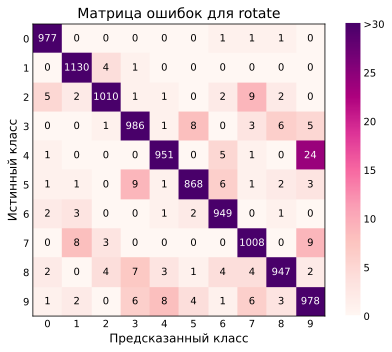

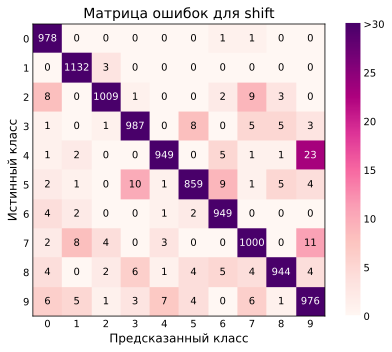

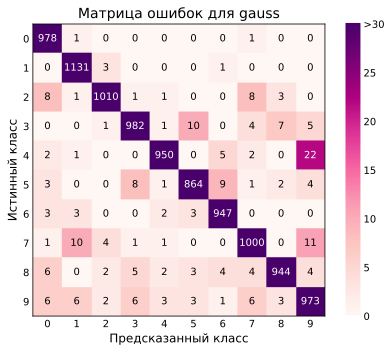

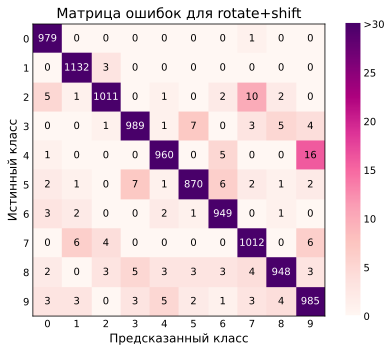

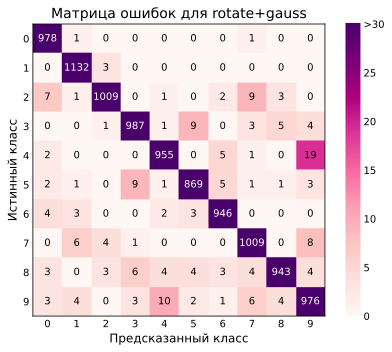

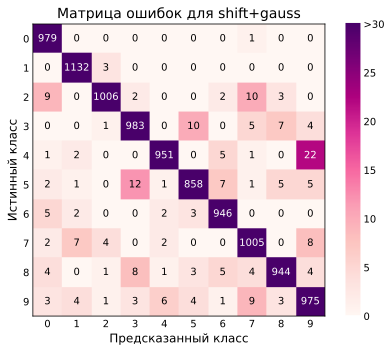

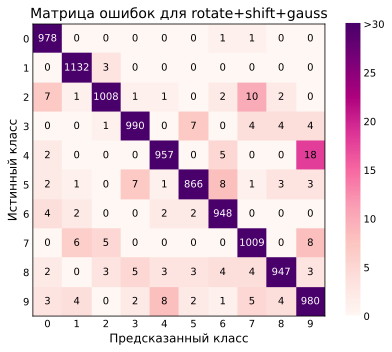

In [55]:
for method in y_pred_aug:
    conf_mat = np.load(f'saved_binaries/5_aug_conf_mat_{method}.npy', allow_pickle=False)
    fig, ax = do_conf_mat(conf_mat, name=f'Матрица ошибок для {method}')
    plt.savefig(f'saved_graphics/5_aug_conf_mat_{method}.pdf')
    plt.show()

As can be seen from the confusion matrices, different transformations solve different problems

In [56]:
for method in y_pred_aug:
    acc = get_score('accuracy', y_test, y_pred_aug[method])
    print(f'Accuracy on {method}: {acc * 100} %')

Accuracy on rotate: 98.04 %
Accuracy on shift: 97.83 %
Accuracy on gauss: 97.78999999999999 %
Accuracy on rotate+shift: 98.35000000000001 %
Accuracy on rotate+gauss: 98.04 %
Accuracy on shift+gauss: 97.78999999999999 %
Accuracy on rotate+shift+gauss: 98.15 %


## Experiment 6

In [59]:
aug_transformations = {
    'rotate': [[5, -5], [10, -10], [15, -15]],
    'shift': [[(0, 1), (0, -1)], [(0, 2), (0, -2)], [(0, 3), (0, -3)],
              [(1, 0), (-1, 0)], [(2, 0), (-2, 0)], [(3, 0), (-3, 0)]],
    'gauss': [[0.5], [1], [1.5]],
}

In [60]:
n_neighbors = list(range(1, 11))
knn_cv_params = {
    'k_list': n_neighbors,
    'metric': 'cosine',
    'weights': True,
    'strategy': 'my_own',
    'test_block_size': 1000
}

In [61]:
def test_aug_f(X, method, option):
    X = X.copy()
    X_transformed = list(X.reshape((-1, 28, 28)))
    if method == 'rotate':
        for j, im in enumerate(X_transformed):
            X_transformed[j] = \
                aug_r(im, option, reshape=False, prefilter=False)
    elif method == 'shift':
        for j, im in enumerate(X_transformed):
          X_transformed[j] = aug_s(im, option)
    elif method == 'gauss':
        for j, im in enumerate(X_transformed):
          X_transformed[j] = aug_g(im, option)
    else:
        raise ValueError(f'Unknown augmentation method {method}')
    X_transformed = np.array(X_transformed).reshape((-1, 784))
    return X_transformed

Cross-validation and saving data:

In [ ]:
aug_cv_acc = dict()
for i, method in enumerate(aug_transformations):
    aug_cv_acc[method] = np.empty((len(aug_transformations[method]),
                                   len(n_neighbors)))
    print(f'Method: {method}')
    for j, case in enumerate(aug_transformations[method]):
        print(f'  Case: {case}')
        start = timer()
        d = my_knn_cv(X_train, y_train, **knn_cv_params,
                      test_aug=[(method, [case])], test_aug_f=test_aug_f)
        finish = timer()
        print(f'    Cross-validation done! \
              Time: {(finish - start):.2f} seconds')
        aug_cv_acc[method][j] = np.array([d[k].mean() for k in d])
    np.save(f'saved_binaries/6_aug_cv_{method}', aug_cv_acc[method],
            allow_pickle=False)
    print(f'==Method data saved!==')

Loading saved cross-validation data:

In [ ]:
aug_cv_acc = dict()
for method in ['rotate', 'shift', 'gauss']:
    if method == 'rotate':
        aug_cv_acc['rotation'] = \
            np.load(f'saved_binaries/6_aug_cv_{method}.npy', allow_pickle=False)
    elif method == 'shift':
        data = \
            np.load(f'saved_binaries/6_aug_cv_{method}.npy', allow_pickle=False)
        l = int(data.shape[0] / 2)
        aug_cv_acc['horizontal shift'] = data[:l]
        aug_cv_acc['vertical shift'] = data[l:]
    elif method == 'gauss':
        aug_cv_acc['gaussian filter'] = \
            np.load(f'saved_binaries/6_aug_cv_{method}.npy', allow_pickle=False)

Cross-validation on no-aug method:

In [ ]:
method = 'no_aug'
print(f'Method: {method}')
no_aug_cv_acc = np.empty(len(n_neighbors))
start = timer()
no_aug_cv_acc_dict = my_knn_cv(X_train, y_train,
                               **knn_cv_params)
finish = timer()
print(f'  Cross-validation done! Time: {(finish - start):.2f} seconds')
no_aug_cv_acc = \
    np.array([no_aug_cv_acc_dict[k].mean() for k in no_aug_cv_acc_dict])
np.save(f'saved_binaries/6_aug_cv_{method}', no_aug_cv_acc, allow_pickle=False)
print(f'==Method data saved!==')

Method: no_aug
  Cross-validation done! Time: 541.47 seconds
==Method data saved!==


Loading saved data:

In [ ]:
method = 'no_aug'
no_aug_cv_acc = \
    np.load(f'saved_binaries/6_aug_cv_{method}.npy', allow_pickle=False)

Plotting cross-validation graphics:

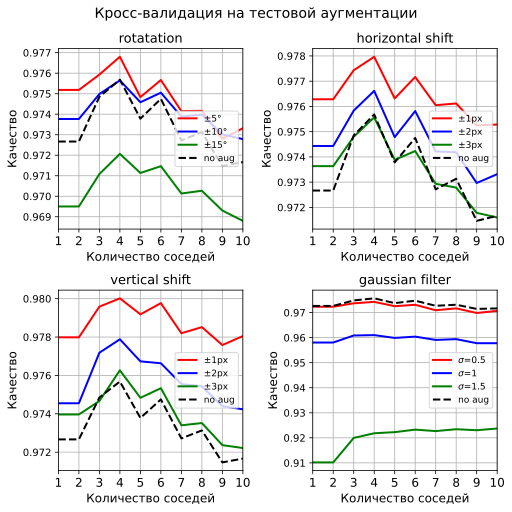

In [ ]:
plt_params = {
    'color': ['r', 'b', 'g', 'black'],
    'linestyle': ['-', '-', '-', '--'],
    'linewidth': [2] * 4,
}

legend = {
    'rotation': ['±5°', '±10°', '±15°', 'no aug'],
    'horizontal shift': ['±1px', '±2px', '±3px', 'no aug'],
    'vertical shift': ['±1px', '±2px', '±3px', 'no aug'],
    'gaussian filter': ['$\sigma$=0.5', '$\sigma$=1',
                        '$\sigma$=1.5', 'no aug']
}

fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(7, 7))
fig.suptitle('Кросс-валидация на тестовой аугментации', fontsize=14)
x_vals = n_neighbors
for i, (method, ax) in enumerate(zip(aug_cv_acc, axes.flatten())):
    ax.set_title(list(legend.keys())[i], fontsize=13)
    ax.set_xticks(n_neighbors)
    ax.set_xticklabels(n_neighbors, fontsize=12)
    ax.set_xlim(1, 10)
    ax.set_xlabel('Количество соседей', fontsize=12)
    ax.set_ylabel('Качество', fontsize=12)
    ax.grid(True) 
    for j, case in enumerate(aug_cv_acc[method]):
        ax.plot(x_vals, case, label=legend[method][j],
                 **{k: plt_params[k][j] for k in plt_params})
    ax.plot(x_vals, no_aug_cv_acc, label=legend[method][-1],
                 **{k: plt_params[k][-1] for k in plt_params})
    ax.legend(fontsize=9, loc='center right')
plt.savefig(f'saved_graphics/6_aug_cv_acc.pdf')
plt.show()

Best transformations:
* Rotation: ±5°
* Shift: ±1px
* Gaussian filter: $\sigma$=0.5

In [62]:
knn_params = {
    'metric': 'cosine',
    'weights': True,
    'strategy': 'my_own',
    'test_block_size': 1000
}

best_aug_trans = {
    'rotate': [[5, -5]],
    'shift': [[(0, 1), (0, -1)], [(1, 0), (-1, 0)]],
    'gauss': [[0.5]],
}

best_aug_k = {
    'rotate': 4,
    'shift': 4,
    'gauss': 4,
}

No-aug prediction:

In [64]:
method = 'no_aug'
print(f'Method: {method}')
y_pred_aug[method] = np.empty(y_test.shape)
start = timer()
clf = my_knn(k=4, **knn_params)
clf.fit(X_train, y_train)
y_pred_aug[method] = clf.predict(X_test)
finish = timer()
print(f'  Prediction done! Time: {(finish - start):.2f} seconds')
np.save(f'saved_binaries/6_aug_pred_{method}', y_pred_aug[method])
print(f'==Method data saved!==')

Method: no_aug
  Prediction done! Time: 132.70 seconds
==Method data saved!==


In [47]:
y_pred_aug=dict()

Aug-methods prediction:

In [66]:
combine_aug_trans = [('rotate',),
                     ('shift',),
                     ('gauss',),
                     ('rotate', 'shift'),
                     ('rotate', 'gauss'),
                     ('shift', 'gauss'),
                     ('rotate', 'shift', 'gauss'),
]
for i, comb in enumerate(combine_aug_trans):
    name = '+'.join(comb)
    y_pred_aug[name] = np.empty(y_test.shape)
    print(f'Method: {name}')
    start = timer()
    test_aug_list = [None] * len(comb)
    for j, method in enumerate(comb):
        case = best_aug_trans[method]
        test_aug_list[j] = (method, case)
    start = timer()
    clf = my_knn(k=best_aug_k[method], **knn_params,
                 test_aug=test_aug_list, test_aug_f=test_aug_f)
    clf.fit(X_train, y_train)
    y_pred_aug[name] = clf.predict(X_test)
    finish = timer()
    print(f'    Prediction done!       \
              Time: {(finish - start):.2f} seconds')
    np.save(f'saved_binaries/6_aug_pred_{name}', y_pred_aug[method])
    print(f'==Method data saved!==')

Method: rotate
    Prediction done!                     Time: 177.93 seconds
==Method data saved!==
Method: shift
    Prediction done!                     Time: 223.23 seconds
==Method data saved!==
Method: gauss
    Prediction done!                     Time: 152.27 seconds
==Method data saved!==
Method: rotate+shift
    Prediction done!                     Time: 261.86 seconds
==Method data saved!==
Method: rotate+gauss
    Prediction done!                     Time: 197.05 seconds
==Method data saved!==
Method: shift+gauss
    Prediction done!                     Time: 245.29 seconds
==Method data saved!==
Method: rotate+shift+gauss
    Prediction done!                     Time: 281.90 seconds
==Method data saved!==


Computing and saving confusion matrix:

In [67]:
for method in y_pred_aug:
  conf_mat = confusion_matrix(y_test, y_pred_aug[method])
  np.save(f'saved_binaries/6_aug_conf_mat_{method}', conf_mat, allow_pickle=False)

Confusion matrices:

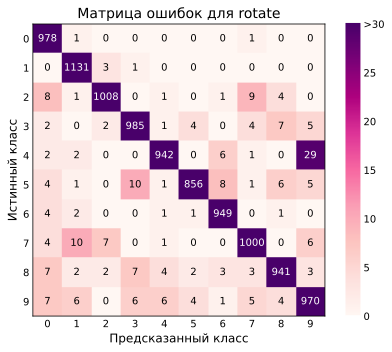

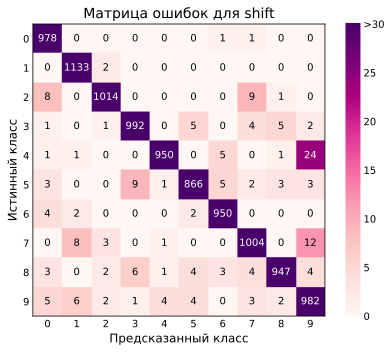

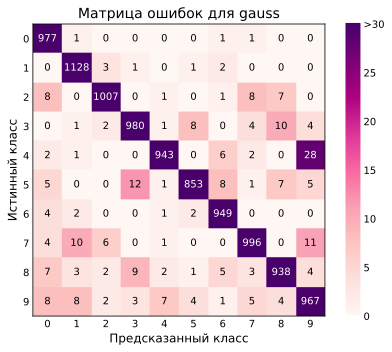

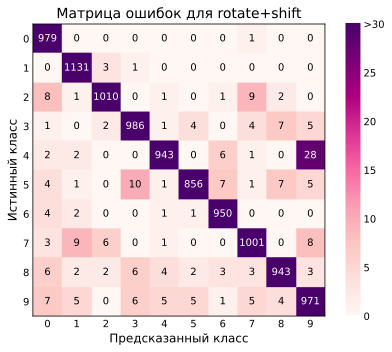

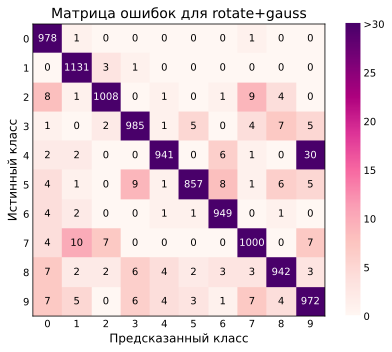

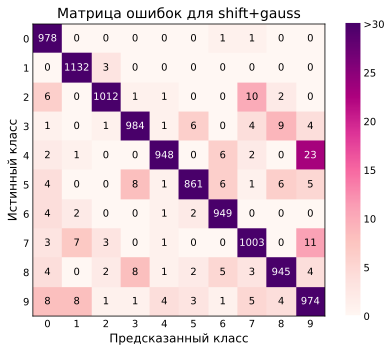

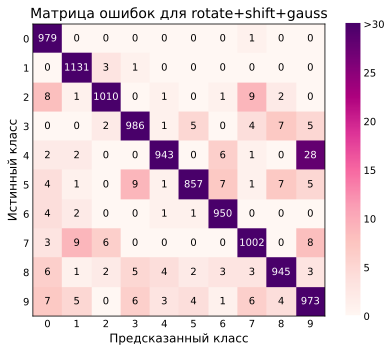

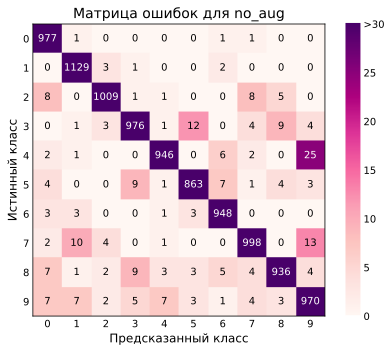

In [68]:
for method in y_pred_aug:
    conf_mat = np.load(f'saved_binaries/6_aug_conf_mat_{method}.npy', allow_pickle=False)
    fig, ax = do_conf_mat(conf_mat, name=f'Матрица ошибок для {method}')
    plt.savefig(f'saved_graphics/6_aug_conf_mat_{method}.pdf')
    plt.show()

Accuracy on test augmentation:

In [70]:
for method in y_pred_aug:
    acc = get_score('accuracy', y_test, y_pred_aug[method])
    print(f'Accuracy on {method}: {acc * 100} %')

Accuracy on rotate: 97.6 %
Accuracy on shift: 98.16 %
Accuracy on gauss: 97.38 %
Accuracy on rotate+shift: 97.7 %
Accuracy on rotate+gauss: 97.63 %
Accuracy on shift+gauss: 97.86 %
Accuracy on rotate+shift+gauss: 97.76 %
Accuracy on no_aug: 97.52 %
